In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as se 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

import itertools
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder 
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
df = pd.read_csv('outliers245.csv')

In [20]:
X=df.drop(columns=['results'])

In [21]:
Y=df['results']

In [22]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [23]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()


Encoded Target: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,clearances,blocks,aerials,fouls,fouled,nsxg,year
0,-0.410000,0.329231,0.606923,0.713846,0.467692,-0.033077,0.140769,0.609231,0.610769,0.639231,-0.492308,-0.385385,0.008462,-0.016923,0.310769,0.633077,2
1,0.553077,0.411538,-0.104615,0.026923,-0.352308,-0.238462,-0.254615,-0.268462,-0.125385,0.029231,-0.119231,-0.279231,-0.150769,-0.266154,-0.406154,-0.210000,94
2,0.493846,0.406923,-0.040769,0.096923,0.100769,-0.169231,0.306154,0.098462,-0.032308,0.130000,0.096923,-0.174615,0.257692,0.289231,-0.020000,0.103846,14
3,-0.255385,-0.186923,-0.104615,-0.193846,-0.077692,-0.091538,-0.092308,0.160769,-0.179231,-0.326923,0.069231,-0.274615,-0.303077,-0.396154,0.679231,-0.465385,94
4,-0.093077,0.301538,0.040769,0.026154,0.253077,-0.100769,0.447692,0.210769,0.017692,-0.276154,-0.280000,-0.256923,-0.163846,-0.283077,0.134615,0.170769,14


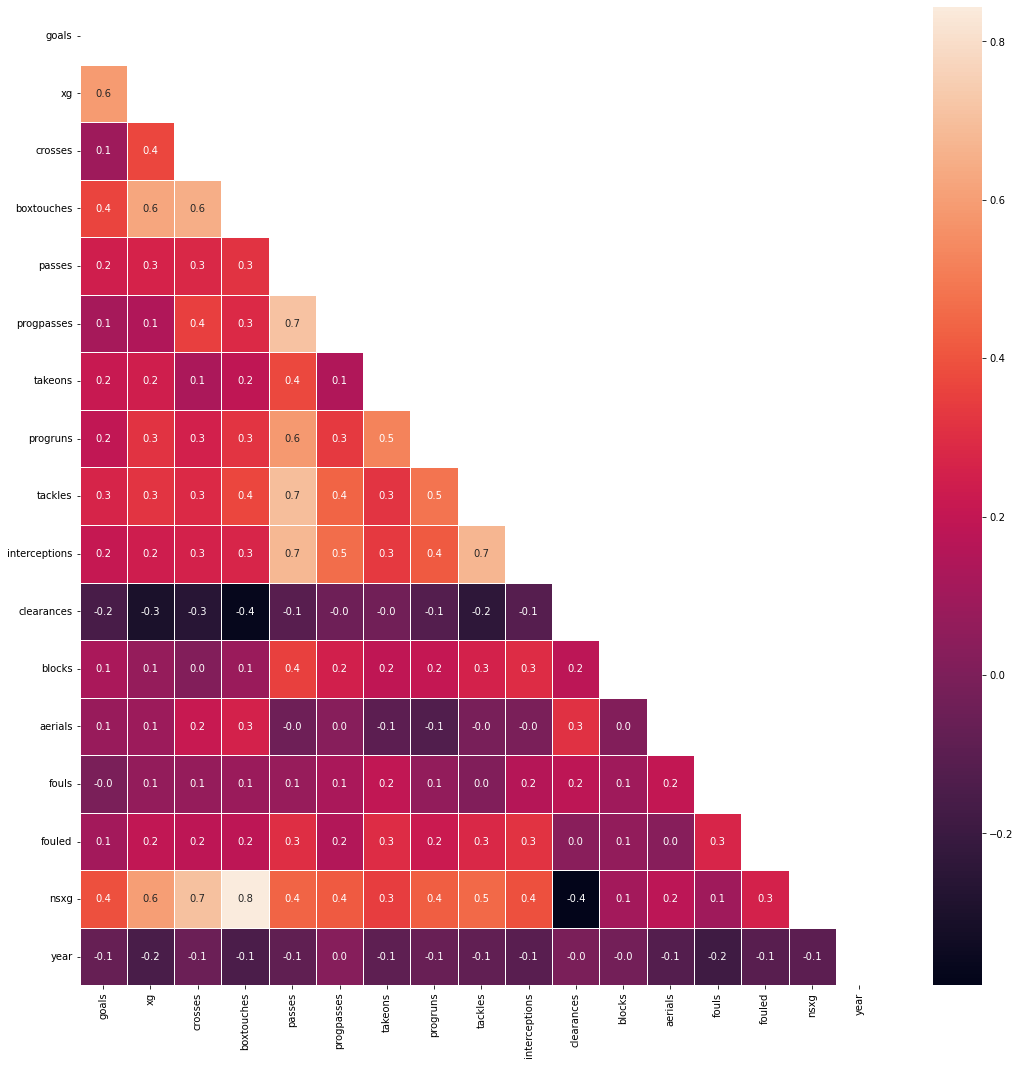

In [24]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()


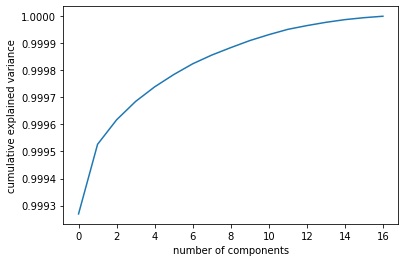

In [25]:
pcaComponents = PCA().fit(X)
plt.plot(np.cumsum(pcaComponents.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

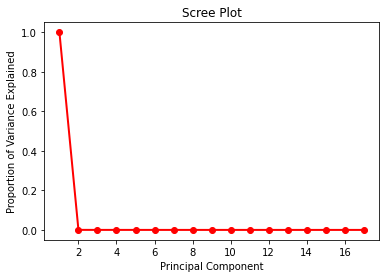

In [26]:
PC_values = np.arange(pcaComponents.n_components_) + 1
plt.plot(PC_values, pcaComponents.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()



In [27]:
pca = PCA(n_components=14)
pcaX = pd.DataFrame(data = pca.fit_transform(X))

In [28]:
finalDF = pcaX

In [29]:
finalDF['results'] = Y
finalDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,results
0,-43.365749,1.250960,-0.220566,0.338259,-0.225208,0.941738,0.058804,-0.276524,-0.156018,0.170072,0.124228,0.237709,-0.013230,0.168278,27
1,48.637907,-0.379346,-0.337048,0.458736,-0.148867,-0.471081,-0.378092,0.103381,-0.331642,-0.039699,-0.101182,0.224825,0.185468,0.067172,17
2,-31.364345,0.166780,-0.106590,-0.167755,0.231669,-0.346577,-0.133006,-0.054672,-0.332183,-0.077276,-0.146847,0.011666,0.009792,0.083162,2
3,48.638616,-0.496670,0.441406,0.300421,0.201846,0.354198,-0.070146,-0.536077,0.498606,-0.265430,0.097902,0.111066,-0.062156,0.024148,20
4,-31.362865,0.075118,-0.039807,0.538208,0.316723,0.236717,0.163163,-0.216349,0.078023,-0.037819,-0.095602,-0.267261,-0.081078,0.274596,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,-39.364251,0.254314,0.253925,-0.317851,-0.057473,-0.189681,0.017107,0.017097,-0.190139,-0.109604,-0.219410,-0.074516,-0.134047,-0.042446,11
241,-31.363256,0.206153,0.295733,0.148610,-0.195326,0.313944,0.307119,0.026687,-0.288936,-0.213254,0.340972,0.176430,0.328853,-0.225786,23
242,44.639198,-0.883355,0.191702,0.194007,-0.079598,0.125678,-0.169366,0.281446,0.160809,-0.329398,-0.092500,0.122539,-0.101203,0.018592,23
243,-27.363560,0.258811,-0.011789,0.267767,0.201709,-0.135318,-0.179004,0.346025,0.094628,-0.316483,0.122550,-0.234110,0.017059,-0.046710,23


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    pcaX, Y, test_size = 0.2, random_state = 123)

In [31]:
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)



In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import TheilSenRegressor


In [33]:
reg = TheilSenRegressor(tol=.000001)


In [34]:
reg.fit(X_train, y_train)

TheilSenRegressor(tol=1e-06)

In [35]:
pred_test= reg.predict(X_test)

In [36]:
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test,pred_test)))) 
print('R2 : '+str(r2_score(y_test, pred_test)))
print('MSE: '+str(mean_squared_error(y_test, pred_test)))
print('MAE: '+str(mean_absolute_error(y_test, pred_test)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, pred_test)))

RMSE : 1.710328924557113e-14
R2 : 1.0
MSE: 2.9252250301766906e-28
MAE: 1.4935898323120473e-14
MAPE: 4.081632653061227
